# Time Series Analysis of project G4 :  4DS2
+ Work done by :
 + Yousri Hamdene
 + Sarra Aissaoui
 + Nermine Haouela
 + Malek Zitouni
 + Nermine Ourimi
 + Ons Dekhil
 + Yahya Amri

  

**Importing Libraries**

In [1]:
#import necessary packages
install.packages("fredr")
install.packages("forecast")
library(fredr)
library(tidyverse)
library(forecast)
library(tseries)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Setting the Fred API **key**

In [2]:
# Set the FRED API key
fredr_set_key("dfc3f6a7abe81eebeb6778a87fdb1bff")

In [3]:
# Importing Data A1
# Get Data A1 time series data
data_a1 <- fredr(series_id = "IPG311A2N",
                 observation_start = as.Date("2004-01-01"),
                 observation_end = as.Date("2024-03-01"))


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  89.83   95.19   97.95   97.87  100.34  105.37 

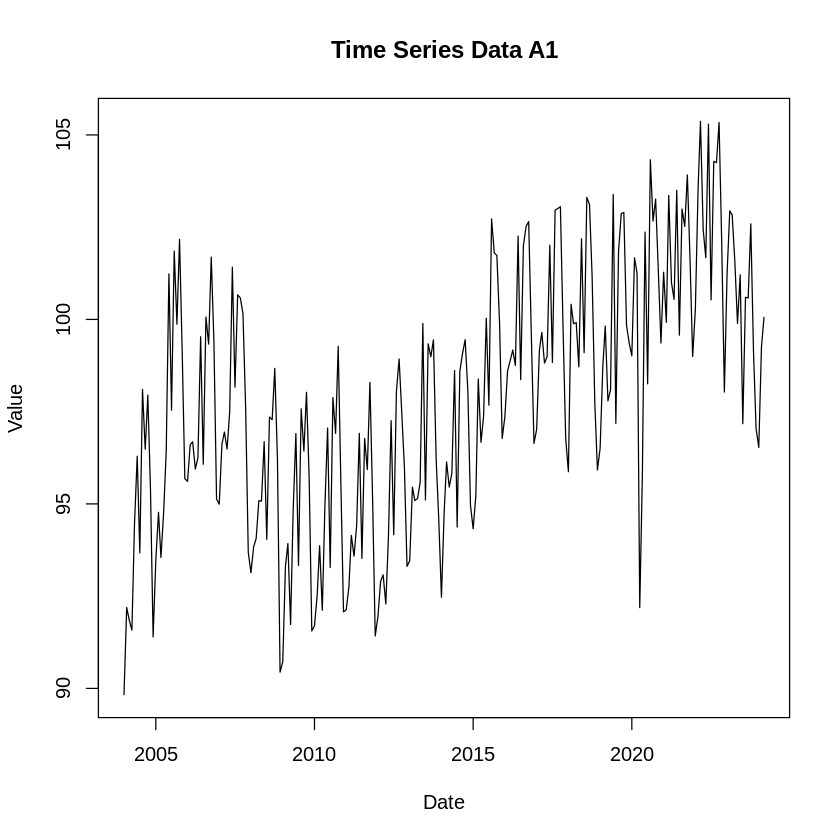

In [4]:
# Summary and plot of Data A1
summary(data_a1$value)
plot(data_a1$date, data_a1$value, type = "l",
     xlab = "Date", ylab = "Value", main = "Time Series Data A1")


In [5]:
# Importing Data B1
# Get Data B1 time series data
data_b1 <- fredr(series_id = "IPG311A2N",
                 observation_start = as.Date("1986-01-01"),
                 observation_end = as.Date("2019-12-01"))


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  73.79   86.70   93.26   91.69   96.77  103.39 

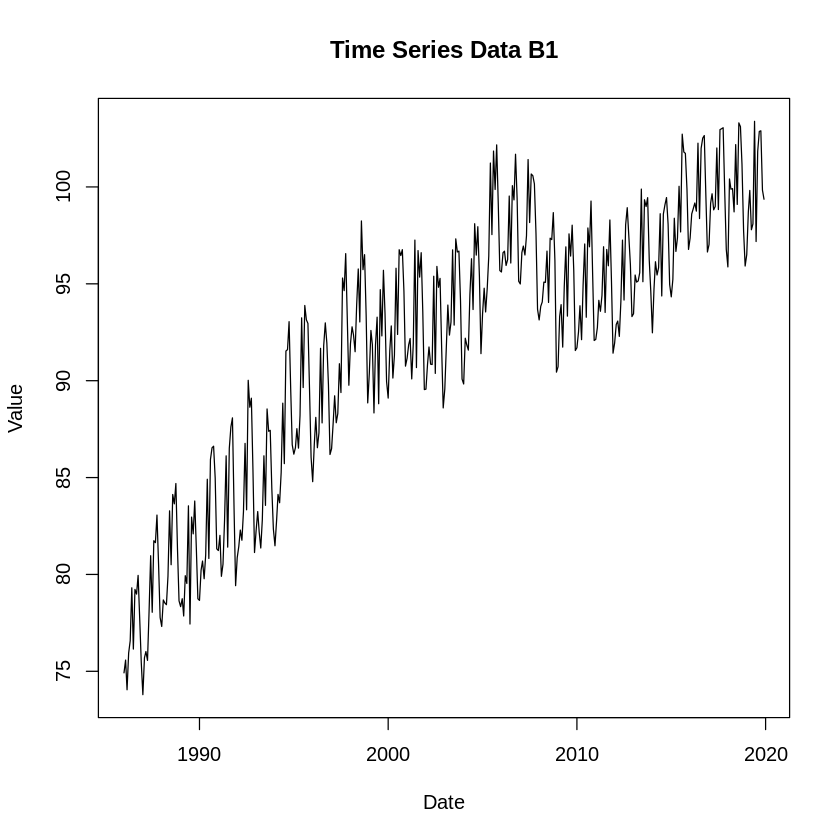

In [6]:
# Summary and plot of Data B1
summary(data_b1$value)
plot(data_b1$date, data_b1$value, type = "l",
     xlab = "Date", ylab = "Value", main = "Time Series Data B1")


In [7]:
# Time series adjustment for Data A1
# Create a time series object
ts_a1 <- ts(data_a1$value, start = c(1994, 1), frequency = 12)

# Extract the trend
trend_a1 <- decompose(ts_a1)$trend

# Extract the seasonality
season_a1 <- decompose(ts_a1)$seasonal

# Fit the model
fit_a1 <- lm(data_a1$value ~ trend_a1 + season_a1)


In [8]:
# Time series adjustment for Data B1
# Create a time series object
ts_b1 <- ts(data_b1$value, start = c(1986, 1), frequency = 12)

# Extract the trend
trend_b1 <- decompose(ts_b1)$trend

# Extract the seasonality
season_b1 <- decompose(ts_b1)$seasonal

# Fit the model
fit_b1 <- lm(data_b1$value ~ trend_b1 + season_b1)



	Box-Ljung test

data:  res_a1
X-squared = 103.57, df = 12, p-value < 2.2e-16


Series: res_a1 
ARIMA(2,0,2) with zero mean 

Coefficients:
         ar1      ar2      ma1     ma2
      1.5142  -0.7642  -1.4104  0.4622
s.e.  0.0941   0.0760   0.1376  0.1354

sigma^2 = 0.7494:  log likelihood = -293.34
AIC=596.68   AICc=596.94   BIC=613.89

Training set error measures:
                     ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.04596937 0.8581722 0.6394526 107.9562 220.7602 0.7520421
                   ACF1
Training set 0.02818406

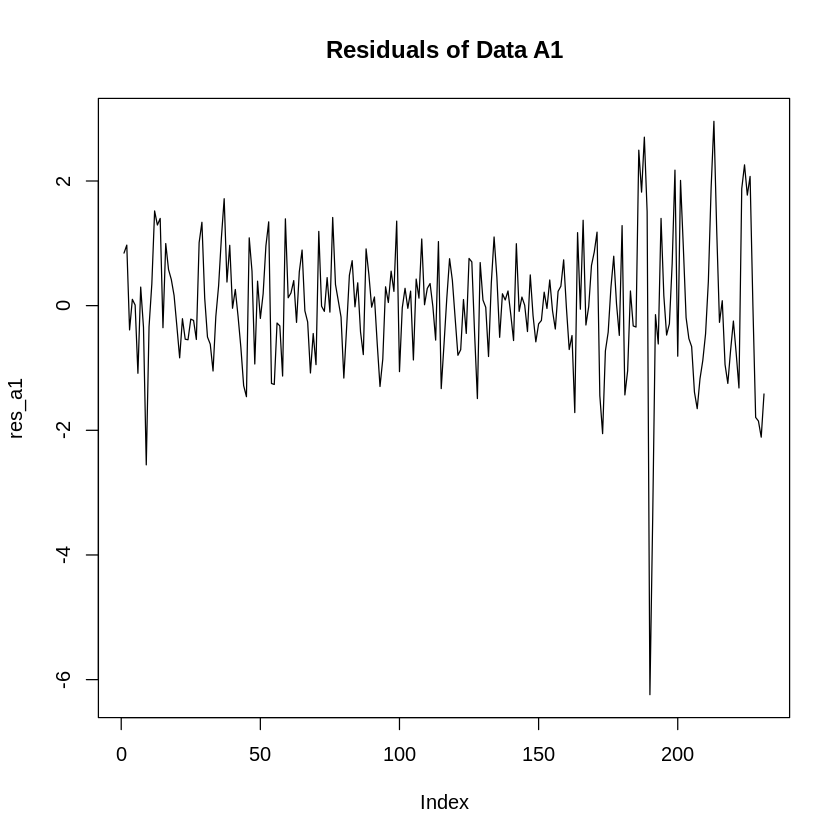

In [9]:
# Residual analysis for Data A1
# Residuals of Data A1
res_a1 <- residuals(fit_a1)
plot(res_a1, type = "l", main = "Residuals of Data A1")

# Ljung-Box Test for autocorrelation in residuals
Box.test(res_a1, lag = 12, type = "Ljung-Box")

# ARIMA modeling for Data A1 residuals
fit_arima_a1 <- auto.arima(res_a1)
summary(fit_arima_a1)



	Box-Ljung test

data:  res_b1
X-squared = 95.88, df = 12, p-value = 3.553e-15


Series: res_b1 
ARIMA(3,0,2) with zero mean 

Coefficients:
         ar1      ar2      ar3      ma1     ma2
      1.3422  -0.5203  -0.0190  -1.2324  0.2824
s.e.  0.2978   0.3372   0.1145   0.2939  0.2770

sigma^2 = 0.507:  log likelihood = -425.38
AIC=862.75   AICc=862.97   BIC=886.64

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.001950134 0.7075381 0.5570287 -32.24199 257.2327 0.7365268
                      ACF1
Training set -0.0002573037

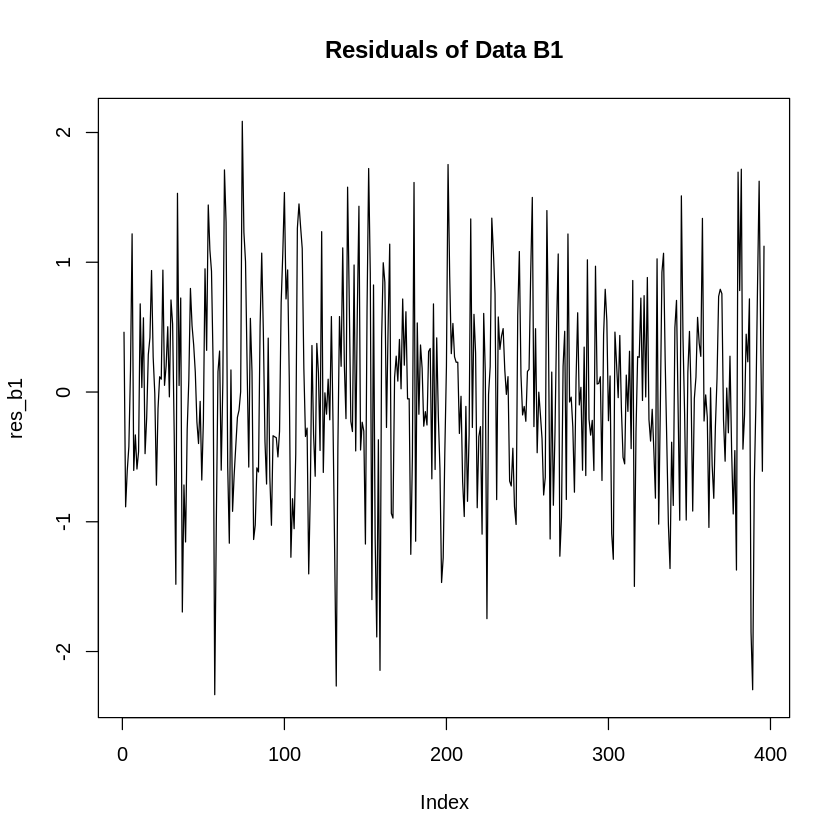

In [10]:
# Residual analysis for Data B1
# Residuals of Data B1
res_b1 <- residuals(fit_b1)
plot(res_b1, type = "l", main = "Residuals of Data B1")

# Ljung-Box Test for autocorrelation in residuals
Box.test(res_b1, lag = 12, type = "Ljung-Box")

# ARIMA modeling for Data B1 residuals
fit_arima_b1 <- auto.arima(res_b1)
summary(fit_arima_b1)
